<a href="https://colab.research.google.com/github/afirdousi/pytorch-basics/blob/main/005_pytorch_workflows_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn # (https://pytorch.org/docs/stable/nn.html)
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

print("Intro to Pytorch Workflow")
print(torch.__version__)

Intro to Pytorch Workflow
2.0.1+cu118


In [3]:
# A PyTorch Workflow

# 1. Prepare and load data
# 2. Build model
# 3. Fit the model (Training)
# 4. Making predictions and evaluate
# 5. Experimentation (We will cover this later)
# 6. Save and load a model
# 7. Putting it all together

In [4]:
# 1. Prepare and load data

# Examples of data (excel sheet, images, videos, audio, text, DNA, IOT device signals, log files, event data streams etc )
# We need to take this data ------ convert via numerical encoding into ------> numerical represetation

In [5]:
# Linear Regression
# Y = mX + b ( X is the explanatory variable, Y is the dependent variable, m is the slope of the line and  b is the intercept i.e value of Y when x=0)

In [6]:
# Create parameters
weight = 0.7 # (m)
bias = 0.03 # (b)

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step) # capital X represents a tensor
print(X)
X = torch.arange(start, end, step).unsqueeze(dim=1) # capital X represents a tensor
print(X)

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.

In [7]:
y = weight * X + bias # this will not always be linear relation

# the whole idea of machine learning is to learn a representation of how input maps to the output
# weight is how important this particular input is to predict the output

In [8]:
X[:10], y[:10] # check first 10 of X and y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.0300],
         [0.0440],
         [0.0580],
         [0.0720],
         [0.0860],
         [0.1000],
         [0.1140],
         [0.1280],
         [0.1420],
         [0.1560]]))

In [9]:
len(X), len(y)

(50, 50)

In [10]:
# Split data into train, validation and test sets
# Generalization: Ability of ML model to perform well on unseen data
# General practice:
# ----- Training data 60~80%
# ----- Validation data 10~20%  (not always necessary)
# ----- Testing data 10~20%

In [11]:
# Creating  a train and test set
train_split = int(0.8 * len(X)) # 80% data for training
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"train_split", { train_split })
print(f"len(X_train) ", { len(X_train) })
print(f"len(y_train.len) ", { len(y_train) })
print(f"len(X_test.len) ", { len(X_test) })
print(f"len(X_test.len) ", { len(X_test) })
# Here we are manually spliting out data which is strictly sequentual meaning first 80% data point for trainin and last 20% for test,
# In real life ML, we want data to be randomize so we get good representation of data in both training and test
# We generally use scikit learns's train_test_split https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

train_split {40}
len(X_train)  {40}
len(y_train.len)  {40}
len(X_test.len)  {10}
len(X_test.len)  {10}


In [14]:
# Visualize our data

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training and test data and compares predictions
  """

  plt.figure(figsize=(5,5))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions
  if predictions is not None:
    # plot predictions if they exist
    plt.scatter(test_data, predictions,  c="r", s=4, label="Predictions")


  # Show legends
  plt.legend(prop={"size": 14})

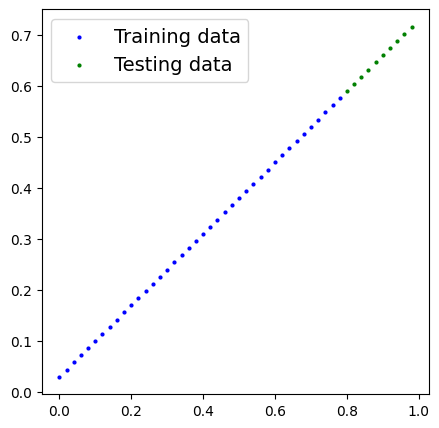

In [15]:
plot_predictions()